In [3]:
import time
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [4]:
#Open all correct dataframes
btc_1d = pd.read_csv('BFX-BTCUSD-1d.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
btc_1h = pd.read_csv('BFX-BTCUSD-1h.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
btc_15m = pd.read_csv('BFX-BTCUSD-15m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
btc_1m = pd.read_csv('BFX-BTCUSD-1m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])

usdt_1d = pd.read_csv('BFX-USTUSD-1d.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
usdt_1h = pd.read_csv('BFX-USTUSD-1h.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
usdt_15m = pd.read_csv('BFX-USTUSD-15m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
usdt_1m = pd.read_csv('BFX-USTUSD-1m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])

usdc_1d = pd.read_csv('BNC-USDCUSDT-1d.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
usdc_1h = pd.read_csv('BNC-USDCUSDT-1h.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
usdc_15m = pd.read_csv('BNC-USDCUSDT-15m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
usdc_1m = pd.read_csv('BNC-USDCUSDT-1m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])

busd_1d = pd.read_csv('BNC-BUSDUSDT-1d.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
busd_1h = pd.read_csv('BNC-BUSDUSDT-1h.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
busd_15m = pd.read_csv('BNC-BUSDUSDT-15m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
busd_1m = pd.read_csv('BNC-BUSDUSDT-1m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])

dai_1d = pd.read_csv('BNC-USDTDAI-1d.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
dai_1h = pd.read_csv('BNC-USDTDAI-1h.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
dai_15m = pd.read_csv('BNC-USDTDAI-15m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])
dai_1m = pd.read_csv('BNC-USDTDAI-1m.csv', usecols=['timestamp', 'open', 'close', 'high', 'low', 'volume'])

In [9]:
def merge(df1, df2, df3, df4, df5, tokenA, tokenB, tokenC, tokenD, tokenE):
    
    #use only relevant columns
    df1_copy = df1[['timestamp', 'close', 'volume']].copy()
    # df2 is USDT
    df2_copy = df2[['timestamp', 'close', 'volume']].copy()
    df3_copy = df3[['timestamp', 'close', 'volume']].copy()
    df4_copy = df4[['timestamp', 'close', 'volume']].copy()
    df5_copy = df5[['timestamp', 'close', 'volume']].copy()
    
    # normalize Binance Stablecoins 
    stables = [[df3_copy, tokenC], [df4_copy, tokenD], [df5_copy, tokenE]]
    for stable in stables:
        temp_stable = df2_copy.merge(stable[0], how='left', on=['timestamp'])
        temp_stable['close'] = temp_stable['close_y'] * temp_stable['close_x']
        temp_stable['volume'] = temp_stable['volume_y']
        stable[0] = temp_stable[['timestamp', 'close', 'volume']].copy()
        
    # Calculate log returns for all tokens + rename all columns
    lst = [[df1_copy, tokenA], [df2_copy, tokenB], [df3_copy, tokenC], [df4_copy, tokenD], [df5_copy, tokenE]]
    for pair in lst:
        column_name = 'return_' + pair[1]
        pair[0].columns = ['timestamp', 'close_' + pair[1], 'volume_' + pair[1]]
        pair[0][column_name] = (pair[0]['close_' + pair[1]].pct_change())
        pair[0][column_name + '_log'] = (np.log(1 + pair[0][column_name])) * 100
        
    
    # Merge all dataframes
    merged = df1_copy.copy()
    lst2 = [df2_copy, df3_copy, df4_copy, df5_copy]
    for df in lst2:
        merged = merged.merge(df, how='left', on=['timestamp'])
        
    # Keep relevant columns
    summaryframe = merged[['timestamp', 'return_BTC_log', 'return_USDT_log', 'return_USDC_log', 'return_BUSD_log', 'return_DAI_log']]
    summaryframe = summaryframe.set_index('timestamp')
    summaryframe = summaryframe.dropna()
    
    return summaryframe, merged

def summary(df1, df2, df3, df4, df5, tokenA, tokenB, tokenC, tokenD, tokenE):
    df, df2 = merge(df1, df2, df3, df4, df5, tokenA, tokenB, tokenC, tokenD, tokenE)
    return df.describe()

In [11]:
descriptive_stats = summary(btc_15m, usdt_15m, dai_15m, busd_15m, usdc_15m, "BTC","USDT", "DAI", "BUSD", "USDC")
print('--- 15-minute timeframe ---')
print(descriptive_stats)
print('___________')
df, df2 = merge(btc_15m, usdt_15m, dai_15m, busd_15m, usdc_15m, "BTC","USDT", "DAI", "BUSD", "USDC")
for column in df.columns:
    result = adfuller(df[str(column)])
    print(column)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('___________')

--- 15-minute timeframe ---
       return_BTC_log  return_USDT_log  return_USDC_log  return_BUSD_log  \
count    14456.000000     14456.000000     14456.000000     1.445600e+04   
mean         0.007330         0.000014         0.000002     6.922042e-07   
std          0.535694         0.023649         0.017842     1.430251e-02   
min         -4.835947        -0.238336        -0.190448    -3.015987e-01   
25%         -0.229390        -0.009996        -0.010003    -9.999500e-03   
50%          0.005129         0.000000         0.000000     0.000000e+00   
75%          0.254010         0.009996         0.010002     9.998500e-03   
max          8.370055         0.295774         0.220000     2.615433e-01   

       return_DAI_log  
count    14456.000000  
mean         0.000030  
std          0.038132  
min         -1.489616  
25%         -0.019986  
50%          0.000000  
75%          0.019992  
max          0.908180  
___________
return_BTC_log
ADF Statistic: -28.198489
p-value: 0.000000


In [6]:
descriptive_stats2 = summary(btc_1h, usdt_1h, dai_1h, busd_1h, usdc_1h, "BTC","USDT", "DAI", "BUSD", "USDC")
print('--- 1-hour timeframe ---')
print(descriptive_stats2)
print('___________')
df, df2 = merge(btc_1h, usdt_1h, dai_1h, busd_1h, usdc_1h, "BTC","USDT", "DAI", "BUSD", "USDC")
for column in df.columns:
    result = adfuller(df[str(column)])
    print(column)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('___________')

--- 1-hour timeframe ---
       return_BTC_log  return_USDT_log  return_USDC_log  return_BUSD_log  \
count     3616.000000      3616.000000      3616.000000      3616.000000   
mean         0.030618         0.000076         0.000014         0.000008   
std          1.004287         0.045811         0.029582         0.027495   
min         -6.808419        -0.332612        -0.441280        -0.602291   
25%         -0.441849        -0.019994        -0.010010        -0.010005   
50%          0.033522         0.000000         0.000000         0.000000   
75%          0.520568         0.019994         0.010010         0.010004   
max         11.497451         0.262707         0.311105         0.512178   

       return_DAI_log  
count     3616.000000  
mean         0.000075  
std          0.049996  
min         -0.867991  
25%         -0.020056  
50%          0.000000  
75%          0.020069  
max          1.249135  
___________
return_BTC_log
ADF Statistic: -14.331400
p-value: 0.000000
Cri

In [ ]:
descriptive_stats3 = summary(btc_1d, usdt_1d, dai_1d, busd_1d, usdc_1d, "BTC","USDT", "DAI", "BUSD", "USDC")
print('--- 15-minute timeframe ---')
print(descriptive_stats3)
print('___________')
df, df2 = merge(btc_1d, usdt_1d, dai_1d, busd_1d, usdc_1d, "BTC","USDT", "DAI", "BUSD", "USDC")
for column in df.columns:
    result = adfuller(df[str(column)])
    print(column)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('___________')

In [5]:
%matplotlib inline

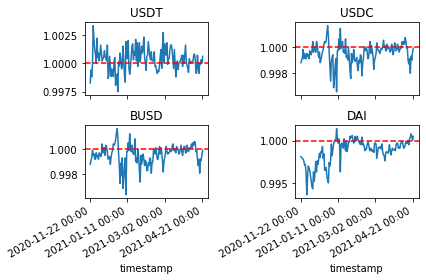

In [44]:
df, df2 = merge(btc_1d, usdt_1d, dai_1d, busd_1d, usdc_1d, "BTC","USDT", "DAI", "BUSD", "USDC")
df2 = df2.set_index('timestamp')


fig1, ax1 = plt.subplots(2, 2)
sub1 = df2['close_USDT'].plot(ax=ax1[0, 0])
sub2 = df2['close_USDC'].plot(ax=ax1[0, 1])
sub3 = df2['close_BUSD'].plot(ax=ax1[1, 0])
sub4 = df2['close_DAI'].plot(ax=ax1[1, 1])
sub1.set_title("USDT")
sub1.axhline(y=1, color='red', linestyle='--')
sub2.set_title("USDC")
sub2.axhline(y=1, color='red', linestyle='--')
sub3.set_title("BUSD")
sub3.axhline(y=1, color='red', linestyle='--')
sub4.set_title("DAI")
sub4.axhline(y=1, color='red', linestyle='--')

fig1.autofmt_xdate()
plt.tight_layout()
plt.savefig('charts.png')
